# ***CLUSTERING DATA KETENAGAKERJAAN DI JAWA TENGAH TAHUN 2023 DENGAN METODE K-MEANS ***

#Read Dataset

In [19]:
import pandas as pd

# Baca dataset
df = pd.read_csv('Data Ketenagakerjaan.csv')
# Tampilkan 5 baris pertama
df.head()


,Kabupaten/Kota,TKK,TPAK,TPT
0,Cilacap,"94,87","66,6","8,74"
1,Banyumas,"91,26","64,6","6,35"
2,Purbalingga,"93,65","73,45","5,61"
3,Banjarnegara,"94,39","71,64","6,26"
4,Kebumen,"93,74","74,54","5,11"


In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Kabupaten/Kota  35 non-null     object
 1   TKK             35 non-null     object
 2   TPAK            35 non-null     object
 3   TPT             35 non-null     object
dtypes: object(4)
memory usage: 1.2+ KB


In [21]:
df.isnull().sum()

,0
Kabupaten/Kota,0
TKK,0
TPAK,0
TPT,0


In [22]:
df.describe()

,Kabupaten/Kota,TKK,TPAK,TPT
count,35,35,35,35
unique,35,32,35,32
top,Cilacap,"95,98","66,6","4,02"
freq,1,2,1,2


In [23]:
# Ganti koma dengan titik desimal, lalu ubah ke float
df['TKK'] = df['TKK'].str.replace(',', '.').astype(float)
df['TPAK'] = df['TPAK'].str.replace(',', '.').astype(float)
df['TPT'] = df['TPT'].str.replace(',', '.').astype(float)

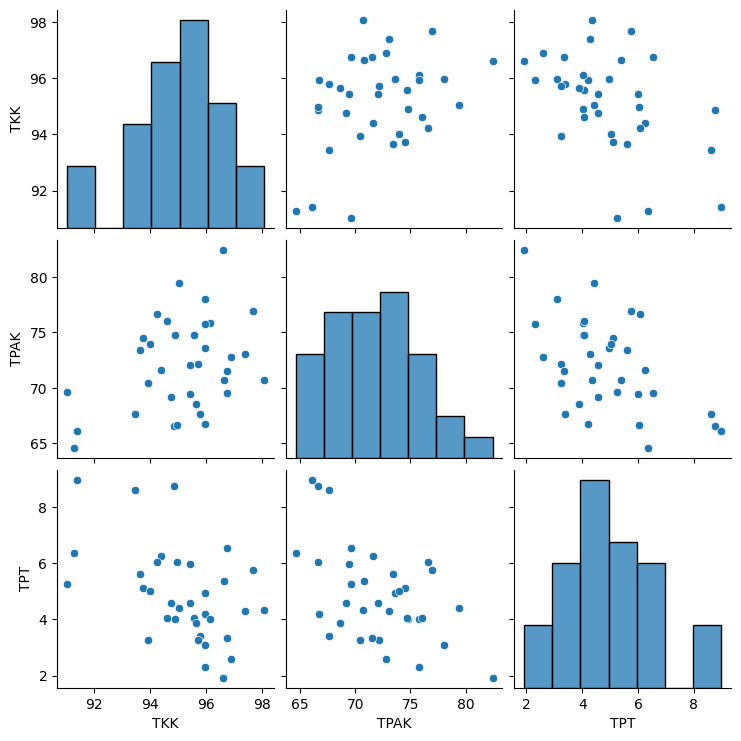

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[['TKK', 'TPAK', 'TPT']])
plt.show()

#Feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['TKK', 'TPAK', 'TPT']])


#Membuat Data Training

In [26]:
x_train=df[['TKK', 'TPAK', 'TPT']]

#Clustering

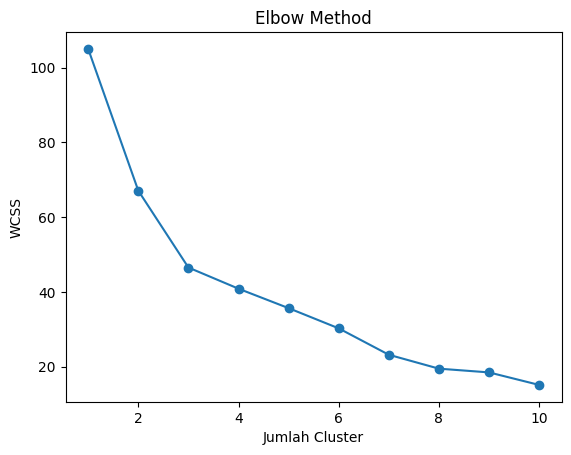

In [27]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()


Nilai K terbaik menurut Metode Elbow adalah 3.

In [28]:
kmeans = KMeans(n_clusters=3, random_state=42)

In [29]:
y_cluster=kmeans.fit_predict(X_scaled)

In [30]:
y_cluster

array([2, 2, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 2, 2, 2, 0, 0, 0, 1, 0], dtype=int32)

In [31]:
df['cluster'] = y_cluster

In [32]:
df

,Kabupaten/Kota,TKK,TPAK,TPT,cluster
0,Cilacap,94.87,66.60,8.74,2
1,Banyumas,91.26,64.60,6.35,2
2,Purbalingga,93.65,73.45,5.61,1
3,Banjarnegara,94.39,71.64,6.26,0
4,Kebumen,93.74,74.54,5.11,1
5,Purworejo,94.89,74.76,4.02,1
6,Wonosobo,95.98,73.59,4.95,1
7,Magelang,95.05,79.45,4.42,1
8,Boyolali,95.58,74.73,4.05,1
9,Klaten,95.95,66.71,4.20,0


In [33]:
kmeans.cluster_centers_

array([[ 0.45233698, -0.4709689 , -0.22135761],
       [ 0.07948431,  0.99374928, -0.33020268],
       [-1.6700344 , -1.27539752,  1.63291185]])

#Visualisasi Data Hasil Clustering

<ipython-input-40-2874222956>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(kmeans.cluster_centers_[0,0],kmeans.cluster_centers_[0,1], cmap='rainbow', marker='*',s=150, label= 'Centroid 0')
<ipython-input-40-2874222956>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(kmeans.cluster_centers_[1,0],kmeans.cluster_centers_[1,1], cmap='rainbow', marker='*',s=150, label= 'Centroid 1')
<ipython-input-40-2874222956>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(kmeans.cluster_centers_[2,0],kmeans.cluster_centers_[2,1], cmap='rainbow', marker='*',s=150, label= 'Centroid 2')


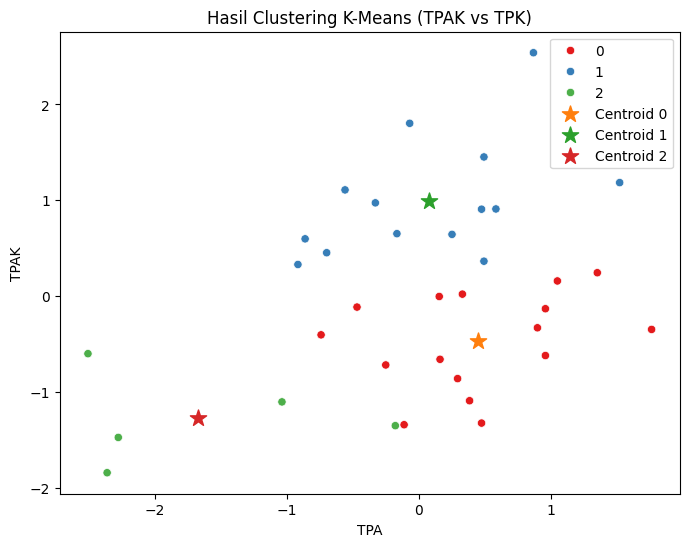

In [40]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:, 0], hue = df['cluster'], y=X_scaled[:,1], palette='Set1')
plt.scatter(kmeans.cluster_centers_[0,0],kmeans.cluster_centers_[0,1], cmap='rainbow', marker='*',s=150, label= 'Centroid 0')
plt.scatter(kmeans.cluster_centers_[1,0],kmeans.cluster_centers_[1,1], cmap='rainbow', marker='*',s=150, label= 'Centroid 1')
plt.scatter(kmeans.cluster_centers_[2,0],kmeans.cluster_centers_[2,1], cmap='rainbow', marker='*',s=150, label= 'Centroid 2')
plt.title('Hasil Clustering K-Means (TPAK vs TPK)')
plt.xlabel('TPA')
plt.ylabel('TPAK')
plt.legend()
plt.show()

<ipython-input-41-63207017>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(kmeans.cluster_centers_[2,0],kmeans.cluster_centers_[2,2], marker='*',s=150, label= 'Centroid 2',  cmap='rainbow')


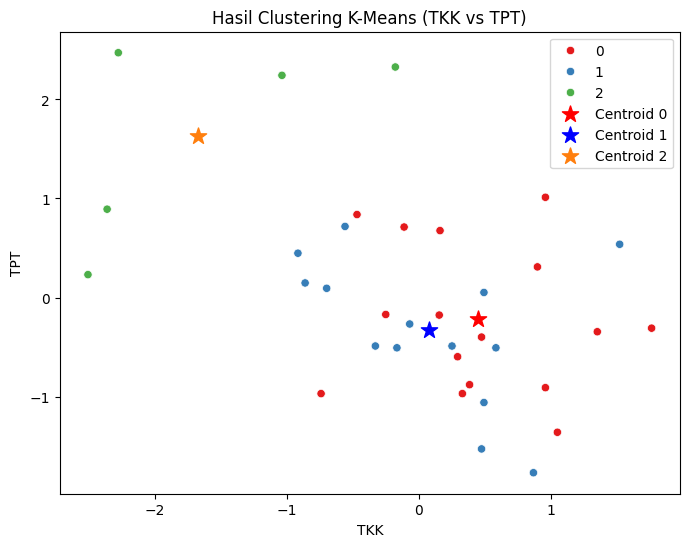

In [41]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:,2], hue = df['cluster'],palette='Set1')
# Perbaiki indeks centroid dari 2 menjadi 1, dan gunakan koordinat 0 dan 2 (untuk TKK dan TPT)
plt.scatter(kmeans.cluster_centers_[0,0],kmeans.cluster_centers_[0,2], marker='*',s=150, label= 'Centroid 0', color='red')
plt.scatter(kmeans.cluster_centers_[1,0],kmeans.cluster_centers_[1,2], marker='*',s=150, label= 'Centroid 1', color='blue')
plt.scatter(kmeans.cluster_centers_[2,0],kmeans.cluster_centers_[2,2], marker='*',s=150, label= 'Centroid 2',  cmap='rainbow')
plt.title('Hasil Clustering K-Means (TKK vs TPT)') # Update title to reflect variables
plt.xlabel('TKK')
plt.ylabel('TPT')
plt.legend()
plt.show()

<ipython-input-42-106498124>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(kmeans.cluster_centers_[2,1],kmeans.cluster_centers_[2,2], marker='*',s=150, label= 'Centroid 2',  cmap='rainbow')


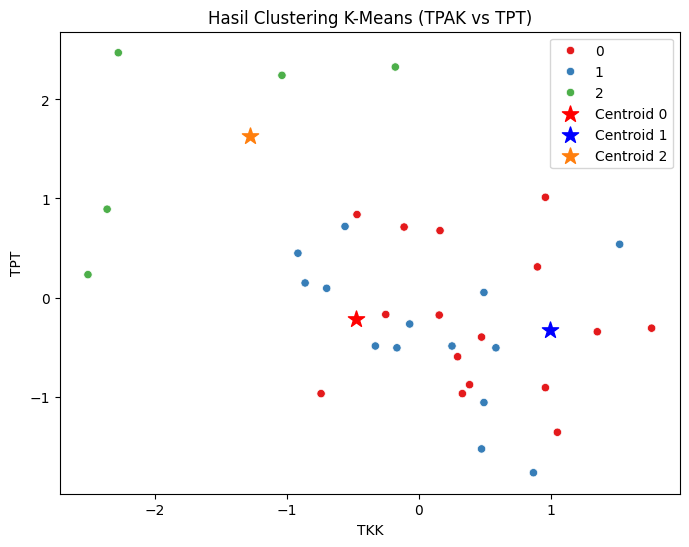

In [42]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:,2], hue = df['cluster'],palette='Set1')
# Perbaiki indeks centroid dari 2 menjadi 1, dan gunakan koordinat 1 dan 2 (untuk TKK dan TPT)
plt.scatter(kmeans.cluster_centers_[0,1],kmeans.cluster_centers_[0,2], marker='*',s=150, label= 'Centroid 0', color='red')
plt.scatter(kmeans.cluster_centers_[1,1],kmeans.cluster_centers_[1,2], marker='*',s=150, label= 'Centroid 1', color='blue')
plt.scatter(kmeans.cluster_centers_[2,1],kmeans.cluster_centers_[2,2], marker='*',s=150, label= 'Centroid 2',  cmap='rainbow')
plt.title('Hasil Clustering K-Means (TPAK vs TPT)') # Update title to reflect variables
plt.xlabel('TKK')
plt.ylabel('TPT')
plt.legend()
plt.show()

In [37]:
df['cluster'].value_counts()

,count
cluster,
0,16
1,14
2,5


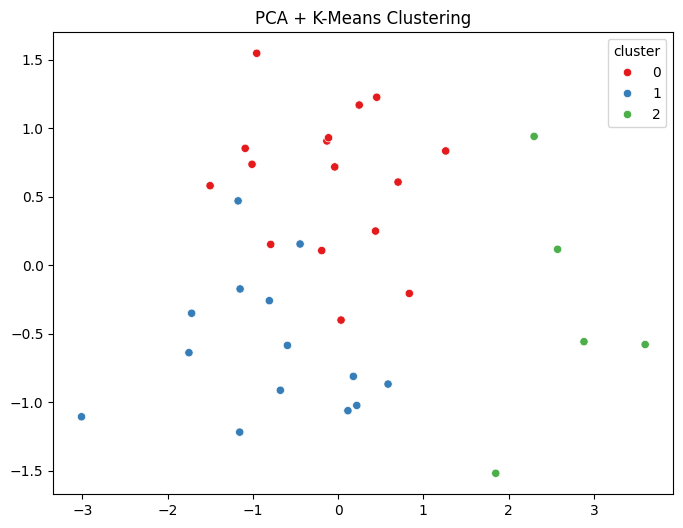

In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['cluster'], palette='Set1')
plt.title('PCA + K-Means Clustering')
plt.show()


#Membuat Dataset Baru dengan label cluster

In [44]:
df['cluster'] = df['cluster'].replace({0: 'Kurang', 1: 'Cukup', 2: 'Baik'})

In [46]:
df

,Kabupaten/Kota,TKK,TPAK,TPT,cluster
0,Cilacap,94.87,66.60,8.74,Baik
1,Banyumas,91.26,64.60,6.35,Baik
2,Purbalingga,93.65,73.45,5.61,Cukup
3,Banjarnegara,94.39,71.64,6.26,Kurang
4,Kebumen,93.74,74.54,5.11,Cukup
5,Purworejo,94.89,74.76,4.02,Cukup
6,Wonosobo,95.98,73.59,4.95,Cukup
7,Magelang,95.05,79.45,4.42,Cukup
8,Boyolali,95.58,74.73,4.05,Cukup
9,Klaten,95.95,66.71,4.20,Kurang


In [45]:
df.head()


,Kabupaten/Kota,TKK,TPAK,TPT,cluster
0,Cilacap,94.87,66.60,8.74,Baik
1,Banyumas,91.26,64.60,6.35,Baik
2,Purbalingga,93.65,73.45,5.61,Cukup
3,Banjarnegara,94.39,71.64,6.26,Kurang
4,Kebumen,93.74,74.54,5.11,Cukup


In [47]:
# Assign the 'cluster' column back to the main DataFrame
df['cluster'] = kmeans.labels_

# Replace numerical cluster labels with descriptive labels
df['cluster'] = df['cluster'].replace({0: 'Kurang', 1: 'Cukup', 2: 'Baik'})